<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Homework05_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 Logistic Regression

For this homework, you are given a data set on students' exam scores and whether they are admitted to a program. Please complete the following tasks to build a logistic regression model that can be used to predict future admissions.

**Please submit your work as a PDF file to Blackboard by Wednesday, November 2nd at 11:59 PM.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline

In [2]:
# dark theme for matplotlib figures
plt.style.use(["dark_background"])

In [3]:
# increase the scale of matplotlib figures
mpl.rcParams['figure.dpi'] = mpl.rcParamsDefault['figure.dpi'] * 1.2

In [4]:
# load the data
url = "https://raw.githubusercontent.com/ch00226855/CMP414765Fall2022/main/data/ExamScores.txt"
data = pd.read_csv(url, names = ["Exam1", "Exam2", "Admitted"])

In [5]:
# preview the data
display(data.head())
print("Shape:", data.shape)

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Shape: (100, 3)


(1) Split the data set into `data_train` (80%) and `data_test` (20%)

In [6]:
# split the data frame into two seperate data frames: one for training and one for testing
data_train, data_test = train_test_split(data, test_size=0.2)

In [7]:
# preview the split data frames with the training and testing data
display(data_train[:5], data_test[:5])
print(f"Shape (Train, Test): {data_train.shape}, {data_test.shape}")

,Exam1,Exam2,Admitted
8,76.098787,87.420570,1
17,67.946855,46.678574,0
65,66.560894,41.092098,0
71,64.039320,78.031688,1
33,52.045405,69.432860,1


,Exam1,Exam2,Admitted
67,49.072563,51.883212,0
54,50.286496,49.804539,0
9,84.432820,43.533393,1
16,69.070144,52.740470,1
48,62.073064,96.768824,1


Shape (Train, Test): (80, 3), (20, 3)


(2) Create a scatter plot for `data_train`. Use different colors to distinguish admitted students and not-admitted students.

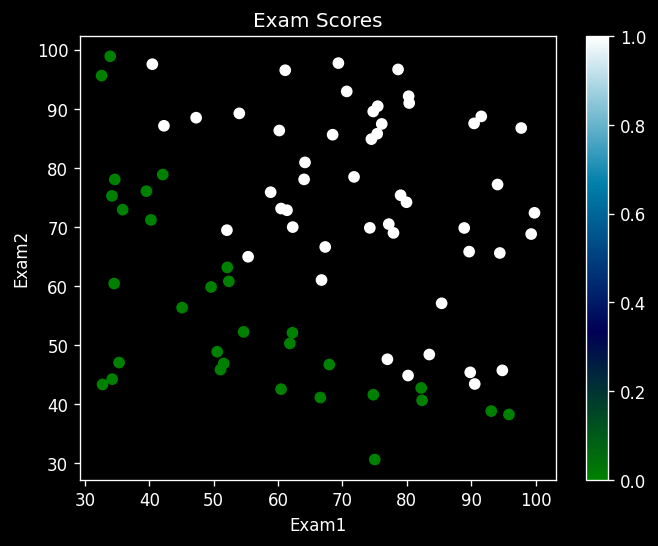

In [8]:
plt.scatter(data_train["Exam1"], data_train["Exam2"], c = data_train["Admitted"], cmap="ocean")
plt.title("Exam Scores")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.colorbar()

(3) Use the `LogisticRegression` class from `sklearn` to train a logistic regression model on the training set.

In [9]:
# train a logistic regression model using the features 
lr_model = LogisticRegression().fit(data_train[["Exam1", "Exam2"]], data_train["Admitted"])

In [10]:
# make predictions to evaluate the model
admitted_predictions = lr_model.predict(data_test[["Exam1", "Exam2"]])

(4) Visualize the decision boundary of the model.

In [11]:
# create a grid of points for the decision boundary with the range of the exam scores
# note that exam scores range from 0 to 100 points
x0, x1 = np.asarray(np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100)))

In [12]:
print(x0.shape, x1.shape)

(100, 100) (100, 100)


In [13]:
# obtain the prediction probabilities
x_prob = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_prob = lr_model.predict_proba(x_prob)

/home/suke/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
# find the boundary points using a probability of 0.5 as threshold
indices = np.where((y_prob[:, 1] > 0.49) & (y_prob[:, 1] < 0.51))
x_bound = x_prob[indices]

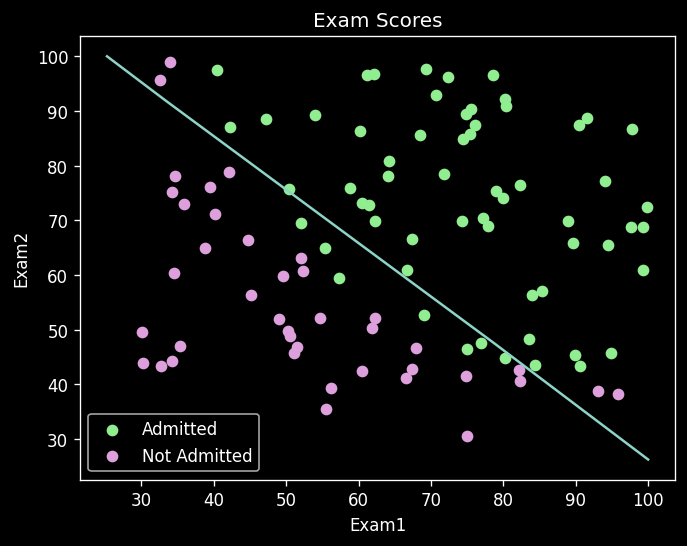

In [15]:
# plot the boundary
plt.plot(x_bound[:, 0], x_bound[:, 1])
admitted_indices, not_admitted_indices = (data["Admitted"] == 1), (data["Admitted"] == 0)
plt.scatter(data.loc[admitted_indices, "Exam1"], data.loc[admitted_indices, "Exam2"],
            c = "lightgreen", label = "Admitted")
plt.scatter(data.loc[not_admitted_indices, "Exam1"], data.loc[not_admitted_indices, "Exam2"],
            c = "plum", label = "Not Admitted")
plt.title("Exam Scores")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend()

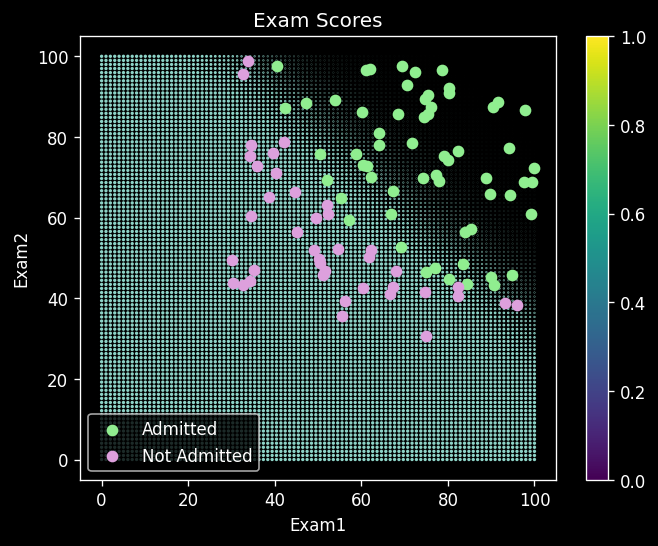

In [16]:
# plot the probability
plt.scatter(x_prob[:, 0], x_prob[:, 1], y_prob[:, 0])
admitted_indices, not_admitted_indices = (data["Admitted"] == 1), (data["Admitted"] == 0)
plt.scatter(data.loc[admitted_indices, "Exam1"], data.loc[admitted_indices, "Exam2"],
            c = "lightgreen", label = "Admitted")
plt.scatter(data.loc[not_admitted_indices, "Exam1"], data.loc[not_admitted_indices, "Exam2"],
            c = "plum", label = "Not Admitted")
plt.title("Exam Scores")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend()
plt.colorbar()

(5) Calculate the recall, accuracy, and precision scores on the test set.

In [17]:
recall = recall_score(data_test["Admitted"], admitted_predictions)
accuracy = accuracy_score(data_test["Admitted"], admitted_predictions)
precision = precision_score(data_test["Admitted"], admitted_predictions)

In [18]:
print(f"Recall: {recall:0.2}\nAccuracy: {accuracy:0.2}\nPrecision: {precision:0.2}")

Recall: 0.73
Accuracy: 0.85
Precision: 1.0
